In [3]:
# Import modules
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
# 변수 정의
x = sp.symbols('x y', real=True)

# 목적 함수 f(x) 정의 (sin을 sympy에서 가져옴)
f = sp.sin(3*x) + 0.1*x**2

# Gradient and Hessian (symbolic)
grad = sp.Matrix([sp.diff(f, var) for var in (x, y)])

print("f =", f)
print("∇f =", grad)

NameError: name 'y' is not defined

In [ ]:
# Convert SymPy object into NumPy object

f_fn    = sp.lambdify((x), f, "numpy")
grad_fn = sp.lambdify((x), grad, "numpy")

In [ ]:
# Gradient descent, AdaGrad, RMSProp, Adam

theta_gd      = np.array([5.0])
theta_adagrad = np.array([5.0])
theta_rmsprop = np.array([5.0])
theta_adam    = np.array([5.0])

alpha = 0.1      
n_iter = 10

# AdaGrad 변수
G_adagrad = 0.0
eps = 1e-8

# RMSProp 변수
G_rmsprop = 0.0
rho = 0.9

# Adam 변수
m = 0.0
v = 0.0
beta1 = 0.9
beta2 = 0.999

print("iter |   GD_theta   | AdaGrad_theta | RMSProp_theta |   Adam_theta   | f(GD) | f(AdaGrad) | f(RMSProp) | f(Adam)")
print("-"*100)
for i in range(n_iter):
    g_gd      = np.array(grad_fn(theta_gd[0]), dtype=float).flatten()
    g_adagrad = np.array(grad_fn(theta_adagrad[0]), dtype=float).flatten()
    g_rmsprop = np.array(grad_fn(theta_rmsprop[0]), dtype=float).flatten()
    g_adam    = np.array(grad_fn(theta_adam[0]), dtype=float).flatten()
    
    # 1. Vanilla Gradient Descent
    theta_gd = theta_gd - alpha * g_gd

    # 2. AdaGrad
    G_adagrad += g_adagrad[0]**2
    theta_adagrad = theta_adagrad - (alpha / (np.sqrt(G_adagrad) + eps)) * g_adagrad

    # 3. RMSProp
    G_rmsprop = rho * G_rmsprop + (1 - rho) * g_rmsprop[0]**2
    theta_rmsprop = theta_rmsprop - (alpha / (np.sqrt(G_rmsprop) + eps)) * g_rmsprop

    # 4. Adam
    m = beta1 * m + (1 - beta1) * g_adam[0]
    v = beta2 * v + (1 - beta2) * (g_adam[0]**2)
    m_hat = m / (1 - beta1**(i+1))
    v_hat = v / (1 - beta2**(i+1))
    theta_adam = theta_adam - alpha * m_hat / (np.sqrt(v_hat) + eps)

    print(f"{i+1:4d} | {theta_gd[0]:11.6f} | {theta_adagrad[0]:13.6f} | {theta_rmsprop[0]:13.6f} | {theta_adam[0]:13.6f} |"
          f" {f_fn(theta_gd[0]):7.4f} | {f_fn(theta_adagrad[0]):10.4f} | {f_fn(theta_rmsprop[0]):10.4f} | {f_fn(theta_adam[0]):7.4f}")

iter |   GD_theta   | AdaGrad_theta | RMSProp_theta |   Adam_theta   | f(GD) | f(AdaGrad) | f(RMSProp) | f(Adam)
----------------------------------------------------------------------------------------------------
   1 |    5.063953 |      5.050000 |      5.158114 |      5.050000 |  3.0579 |     3.0797 |     2.8921 |  3.0797
   2 |    5.143776 |      5.088412 |      5.291102 |      5.100031 |  2.9190 |     3.0176 |     2.6350 |  2.9977
   3 |    5.236635 |      5.120736 |      5.396428 |      5.150174 |  2.7403 |     2.9611 |     2.4492 |  2.9070
   4 |    5.334269 |      5.149039 |      5.476124 |      5.200486 |  2.5549 |     2.9092 |     2.3391 |  2.8108
   5 |    5.424453 |      5.174390 |      5.533561 |      5.250985 |  2.4067 |     2.8612 |     2.2832 |  2.7123
   6 |    5.496865 |      5.197433 |      5.572777 |      5.301633 |  2.3164 |     2.8167 |     2.2586 |  2.6151
   7 |    5.548255 |      5.218599 |      5.598049 |      5.352330 |  2.2726 |     2.7755 |     2.2490 |  2.

/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:

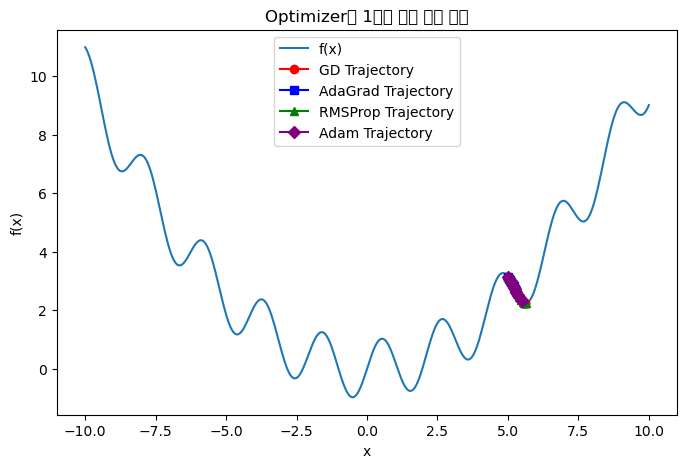

In [ ]:
# 위에서 구현한 GD, AdaGrad, RMSProp, Adam의 궤적을 모두 시각화

# x 값 범위 생성
x_vals = np.linspace(-10, 10, 400)
y_vals = f_fn(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label="f(x)")

# 각 optimizer별 초기값 설정
theta_gd = np.array([5.0])
theta_adagrad = np.array([5.0])
theta_rmsprop = np.array([5.0])
theta_adam = np.array([5.0])

# 하이퍼파라미터 및 변수 초기화
alpha = 0.1
n_iter = 10

G_adagrad = 0.0
eps = 1e-8

G_rmsprop = 0.0
rho = 0.9

m = 0.0
v = 0.0
beta1 = 0.9
beta2 = 0.999

# 각 optimizer별 trajectory 저장
traj_gd = [theta_gd[0]]
traj_adagrad = [theta_adagrad[0]]
traj_rmsprop = [theta_rmsprop[0]]
traj_adam = [theta_adam[0]]

for i in range(n_iter):
    # Gradient 계산
    g_gd      = np.array(grad_fn(theta_gd[0]), dtype=float).flatten()
    g_adagrad = np.array(grad_fn(theta_adagrad[0]), dtype=float).flatten()
    g_rmsprop = np.array(grad_fn(theta_rmsprop[0]), dtype=float).flatten()
    g_adam    = np.array(grad_fn(theta_adam[0]), dtype=float).flatten()
    
    # 1. Vanilla Gradient Descent
    theta_gd = theta_gd - alpha * g_gd
    traj_gd.append(theta_gd[0])

    # 2. AdaGrad
    G_adagrad += g_adagrad[0]**2
    theta_adagrad = theta_adagrad - (alpha / (np.sqrt(G_adagrad) + eps)) * g_adagrad
    traj_adagrad.append(theta_adagrad[0])

    # 3. RMSProp
    G_rmsprop = rho * G_rmsprop + (1 - rho) * g_rmsprop[0]**2
    theta_rmsprop = theta_rmsprop - (alpha / (np.sqrt(G_rmsprop) + eps)) * g_rmsprop
    traj_rmsprop.append(theta_rmsprop[0])

    # 4. Adam
    m = beta1 * m + (1 - beta1) * g_adam[0]
    v = beta2 * v + (1 - beta2) * (g_adam[0]**2)
    m_hat = m / (1 - beta1**(i+1))
    v_hat = v / (1 - beta2**(i+1))
    theta_adam = theta_adam - alpha * m_hat / (np.sqrt(v_hat) + eps)
    traj_adam.append(theta_adam[0])

traj_gd = np.array(traj_gd)
traj_adagrad = np.array(traj_adagrad)
traj_rmsprop = np.array(traj_rmsprop)
traj_adam = np.array(traj_adam)

plt.plot(traj_gd, f_fn(traj_gd), marker="o", color="red", label="GD Trajectory")
plt.plot(traj_adagrad, f_fn(traj_adagrad), marker="s", color="blue", label="AdaGrad Trajectory")
plt.plot(traj_rmsprop, f_fn(traj_rmsprop), marker="^", color="green", label="RMSProp Trajectory")
plt.plot(traj_adam, f_fn(traj_adam), marker="D", color="purple", label="Adam Trajectory")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Optimizer별 1차원 함수 궤적 비교")
plt.legend()
plt.show()